# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [87]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
import matplotlib.pyplot as plt

## Data Importing

In [20]:
# load one file first to see what type of data you're dealing with and what attributes it has
with open('..\data\AK_Juneau_4.json', 'r') as f:
    data = json.load(f)
#show me the data
pprint(data)
#create a data frame to see what the information is
testing_df = pd.DataFrame(data['data']['results'])


{'data': {'count': 4,
          'results': [{'branding': [{'name': None,
                                     'photo': None,
                                     'type': 'Office'}],
                       'community': None,
                       'description': {'baths': None,
                                       'baths_1qtr': None,
                                       'baths_3qtr': None,
                                       'baths_full': None,
                                       'baths_half': None,
                                       'beds': None,
                                       'garage': None,
                                       'lot_sqft': None,
                                       'name': None,
                                       'sold_date': '2023-08-21',
                                       'sold_price': None,
                                       'sqft': None,
                                       'stories': None,
                                  

 - After looking through the file we can deduce all the information we need is inside ['data']['results']

In [21]:
# loop over all files and put them into a dataframe
#Create the variables we will use to loop the data
folder_name = '..\data'
filenames = os.listdir(folder_name)
df = pd.DataFrame()
empty_files = []
#Iterate through every data file we have
for file in filenames:
    #ensure files are "json" files
    if file.endswith(".json"):
        file_path = os.path.join(folder_name, file)

        with open(file_path, 'r') as f:
            try:
                data = json.load(f)
                #create a small dataframe which we will add onto the large one
                small_df = pd.DataFrame(data['data']['results'])
                # print(file, "Loaded Sucessfully") - for testing purposes
                #add the new data to the bottom of our dataframe
                if small_df.empty:
                    # print("file is empty:", file)
                    empty_files.append(file)
                else:
                    df = pd.concat([df, small_df], ignore_index = True)
            except json.JSONDecodeError as e:
                #print if there was an error
                print("Error Decoding file:", e, file)
    else:
        #print out any files that are not part of it
        print("Not a Json:", file)
            
df.head()


Not a Json: .gitkeep


C:\Users\finch\AppData\Local\Temp\ipykernel_28812\2688945753.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, small_df], ignore_index = True)


,primary_photo,last_update_date,source,tags,permalink,status,list_date,open_houses,description,branding,...,photos,flags,community,products,virtual_tours,other_listings,listing_id,price_reduced_amount,location,matterport
0,{'href': 'https://ap.rdcpix.com/07097d34c98a59...,2023-09-19T20:52:50Z,"{'plan_id': None, 'agents': [{'office_name': '...","[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"{'year_built': 1963, 'baths_3qtr': None, 'sold...","[{'name': 'EXP Realty LLC - Southeast Alaska',...",...,"[{'tags': [{'label': 'house_view', 'probabilit...","{'is_new_construction': None, 'is_for_rent': N...",None,{'brand_name': 'basic_opt_in'},None,"{'rdc': [{'listing_id': '2957241843', 'listing...",2957241843,45000.0,"{'address': {'postal_code': '99801', 'state': ...",False
1,None,None,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"{'year_built': None, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,None,None,"{'rdc': [{'listing_id': '2958935271', 'listing...",None,NaN,"{'address': {'postal_code': '99801', 'state': ...",False
2,None,None,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"{'year_built': None, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,None,None,"{'rdc': [{'listing_id': '2958935192', 'listing...",None,NaN,"{'address': {'postal_code': '99801', 'state': ...",False
3,None,None,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"{'year_built': None, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,None,None,"{'rdc': [{'listing_id': '2958925235', 'listing...",None,NaN,"{'address': {'postal_code': '99801', 'state': ...",False
4,None,None,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"{'year_built': None, 'baths_3qtr': None, 'sold...","[{'name': None, 'photo': None, 'type': 'Office'}]",...,None,"{'is_new_construction': None, 'is_for_rent': N...",None,None,None,"{'rdc': [{'listing_id': '2958924367', 'listing...",None,NaN,"{'address': {'postal_code': '99801', 'state': ...",False


In [22]:
empty_files
#manually went through and checked a chunk of these files to ensure they are empty and wasn't an error on my coding part.

['HI_Honolulu_3.json',
 'HI_Honolulu_4.json',
 'ME_Augusta_0.json',
 'ME_Augusta_1.json',
 'ME_Augusta_2.json',
 'ME_Augusta_3.json',
 'ME_Augusta_4.json',
 'MS_Jackson_0.json',
 'MS_Jackson_1.json',
 'MS_Jackson_2.json',
 'MS_Jackson_3.json',
 'MS_Jackson_4.json',
 'ND_Bismarck_2.json',
 'ND_Bismarck_3.json',
 'ND_Bismarck_4.json',
 'NH_Concord_3.json',
 'NH_Concord_4.json',
 'SD_Pierre_0.json',
 'SD_Pierre_1.json',
 'SD_Pierre_2.json',
 'SD_Pierre_3.json',
 'SD_Pierre_4.json',
 'VT_Montpelier_0.json',
 'VT_Montpelier_1.json',
 'VT_Montpelier_2.json',
 'VT_Montpelier_3.json',
 'VT_Montpelier_4.json',
 'WY_Cheyenne_0.json',
 'WY_Cheyenne_1.json',
 'WY_Cheyenne_2.json',
 'WY_Cheyenne_3.json',
 'WY_Cheyenne_4.json']

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [23]:
# load and concatenate data here
# drop or replace values as necessary


In [24]:
df.info() # looks like we only actually want the information in "location" and "description"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   primary_photo         7403 non-null   object 
 1   last_update_date      8125 non-null   object 
 2   source                7752 non-null   object 
 3   tags                  7638 non-null   object 
 4   permalink             8159 non-null   object 
 5   status                8159 non-null   object 
 6   list_date             7752 non-null   object 
 7   open_houses           0 non-null      object 
 8   description           8159 non-null   object 
 9   branding              8159 non-null   object 
 10  list_price            7721 non-null   float64
 11  lead_attributes       8159 non-null   object 
 12  property_id           8159 non-null   object 
 13  photos                7403 non-null   object 
 14  flags                 8159 non-null   object 
 15  community            

In [25]:
df.describe()

,list_price,price_reduced_amount
count,7.721000e+03,2.484000e+03
mean,4.341582e+05,2.442704e+04
std,5.514925e+05,7.162396e+04
min,1.000000e+00,1.000000e+02
25%,2.090000e+05,6.000000e+03
50%,3.250000e+05,1.010000e+04
75%,4.999000e+05,2.000000e+04
max,1.250000e+07,2.015999e+06


In [26]:
#Quick function to break down the inside of a column into its seperate parts
def break_it_down(column):
    col_dict = column.to_dict()
    col_df = pd.DataFrame(col_dict).transpose()
    return col_df

In [27]:
#lets make a full list of columns we want to get rid of:
print(df.columns)
columns_to_drop = ['primary_photo',
                   'last_update_date',
                     'source', 
                      'permalink',
                        'status',
                          'list_date',
                           'open_houses',
                            'branding',
                             'list_price',
                              'lead_attributes',
                              #  'property_id',
                                'photos',
                                'virtual_tours',
                                'other_listings',
                                 'listing_id',
                                  'price_reduced_amount',
                                   'matterport',
                                    'sold_date',
                                     'products',
                                      'street_view_url',
                                       'community',
                                        'county',
                                         'line',
                                          # 'tags',
                                           'flags',
                                            'name',
                                             'baths_1qtr',
                                              'sub_type',
                                               'baths_full',
                                                'baths_half',
                                                 'baths_3qtr',
                                                  'state_code']

#description column is nested, lets pull it out and put it back in all split up nice and pretty

desc_df = break_it_down(df['description'])
columns_to_drop.append('description')
df[desc_df.columns] = desc_df
#lets do the same with the "location column"
loc_df = break_it_down(df['location'])
columns_to_drop.append('location')
#unfortunately "address" is still nested
df[loc_df.columns] = loc_df
address_df = break_it_down(loc_df['address'])
df[address_df.columns] = address_df
columns_to_drop.append('address')
#break down the coordinates so we have them as well.
coordinate_df = break_it_down(address_df['coordinate'])
columns_to_drop.append('coordinate')
df[coordinate_df.columns] = coordinate_df
#will get rid of description so lets throw it onto our list to drop
# columns_to_drop.append(['description', 'location', 'address', 'coordinate'])
#lets get rid of everything without a sold price
df = df.dropna(subset=['sold_price'])

df = df.drop(columns=columns_to_drop, axis=1)
#lets start off with dropping duplicate rows
# df = df.drop_duplicates()
print(df.columns)
df



Index(['primary_photo', 'last_update_date', 'source', 'tags', 'permalink',
       'status', 'list_date', 'open_houses', 'description', 'branding',
       'list_price', 'lead_attributes', 'property_id', 'photos', 'flags',
       'community', 'products', 'virtual_tours', 'other_listings',
       'listing_id', 'price_reduced_amount', 'location', 'matterport'],
      dtype='object')
Index(['tags', 'property_id', 'year_built', 'sold_price', 'lot_sqft', 'sqft',
       'baths', 'garage', 'stories', 'beds', 'type', 'postal_code', 'state',
       'city', 'lon', 'lat'],
      dtype='object')


,tags,property_id,year_built,sold_price,lot_sqft,sqft,baths,garage,stories,beds,type,postal_code,state,city,lon,lat
30,"[central_air, central_heat, community_outdoor_...",8846541030,1998,129900,11761,1478,2,2,1,3,single_family,36117,Alabama,Montgomery,-86.178412,32.389075
31,"[city_view, hardwood_floors, two_or_more_stori...",7727981021,1945,88500,6534,1389,2,1,2,4,single_family,36107,Alabama,Montgomery,-86.273286,32.382748
32,"[carport, central_air, central_heat, dishwashe...",7320925131,1969,145000,17424,2058,2,None,1,3,single_family,36109,Alabama,Montgomery,-86.221454,32.380023
33,"[carport, central_air, city_view, community_ou...",7231604965,1955,65000,9712,1432,2,None,1,3,single_family,36107,Alabama,Montgomery,-86.284387,32.386844
34,"[city_view, single_story, big_yard, fenced_yar...",7700690979,1984,169000,10890,1804,2,None,1,3,single_family,36106,Alabama,Montgomery,-86.232662,32.351898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,"[central_air, forced_air, basement, two_or_mor...",4542127284,1910,99000,4792,1214,1,1,2,3,single_family,25314,West Virginia,Charleston,-81.644994,38.341576
8155,"[basement, big_lot]",3895826397,None,29700,7841,988,1,None,None,3,single_family,25387,West Virginia,Charleston,-81.661662,38.377371
8156,"[basement, big_lot]",4941005485,None,162250,65340,1470,1,None,None,3,single_family,25314,West Virginia,Charleston,-81.659885,38.338617
8157,[rental_property],4306867390,None,63800,None,None,0,None,None,0,single_family,25302,West Virginia,Charleston,-81.644214,38.363038


In [28]:
#lets fill some NAN values, start with garage and the nones we can assume to be 0
df['garage'] = df['garage'].fillna(0)

# lets take the average latitude and longitude for each city 
lon_lat_dict = df[['city', 'lon', 'lat']].groupby('city').mean().transpose().to_dict()
# lets fill those latitude and longitude back into the dataframe for each city
# function to replace the longitude and latitude with the average supplied
def city_replacement(dict, df):
    for city, coords in dict.items():
        df.loc[(df['city'] == city) & (df['lon'].isna()), 'lon'] = coords['lon']
        df.loc[(df['city'] == city) & (df['lat'].isna()), 'lat'] = coords['lat']
    return df
df = city_replacement(lon_lat_dict, df)
#there are still a few missing values so I will use google and manually fill in the last three
missing_dict = {'Boone': {'lon': -93.885490, 'lat': 42.060650},
                'Garnett': {'lon': 81.2454, 'lat': 32.6063},
                'Charlton Heights': {'lon': -81.24385, 'lat': 38.13673}}
df = city_replacement(missing_dict, df)
#all the missing cities (there are 5) are from the one place in columbus ohio
df['city'] = df['city'].fillna('Columbus')
#lets fix some of the "type" column, we're gonna adjust the "other" values to land judging by the other values with them,
#"condos" will be adjusted to "condo"
# we will fill the NaN cells with 'land' as well
df.loc[df['type'] == 'other', 'type'] = 'land' 
df.loc[df['type'] == 'condos', 'type'] = 'condo' 
df['type'] = df['type'].fillna('land')

#lets change the 'year_built', 'sqft', 'baths', 'stories', 'beds' all to 0 for the 'land' types
to_change_list = ['year_built', 'sqft', 'baths', 'stories', 'beds']
for col in to_change_list:
    df.loc[(df['type'] == 'land') & (df[col].isna()), col] = 0 
#lets fill the missing year's built column with the mean from that column with no better method to fill
mean_year = df['year_built'].mean()
df['year_built'] = df['year_built'].fillna(mean_year.astype(int))

#we're going to take the average number of beds and baths from the 'type' to fill into the 
bed_bath_dict = df[['type', 'beds', 'baths']].groupby('type').mean().astype(int).transpose().to_dict()
def bed_bath_replacement(dict, df):
    for type, number in dict.items():
        df.loc[(df['type'] == type) & (df['beds'].isna()), 'beds'] = number['beds']
        df.loc[(df['type'] == type) & (df['baths'].isna()), 'baths'] = number['baths']
    return df
df = bed_bath_replacement(bed_bath_dict, df)
#lets fill the stories down to 0
df['stories'] = df['stories'].fillna(0)
#dropping the two 'types' 'condo_townhome_rowhome_coop' and 'duplex_triplex' as there is only a single one of each
df = df[df['type'] != 'condo_townhome_rowhome_coop']
df = df[df['type'] != 'duplex_triplex']



C:\Users\finch\AppData\Local\Temp\ipykernel_28812\4033243911.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['garage'] = df['garage'].fillna(0)
C:\Users\finch\AppData\Local\Temp\ipykernel_28812\4033243911.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['year_built'] = df['year_built'].fillna(mean_year.astype(int))
C:\Users\finch\AppData\Local\Temp\ipykernel_28812\4033243911.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False

In [29]:
#we're going to do the same with the sqft and lot_sqft, taking the averages from types in cities
sqfts_dict = df[['city', 'type', 'sqft', 'lot_sqft']].groupby(['type','city']).mean().transpose().to_dict()
def sqfts_replacement(dict, df):
    for (type, city), numbers in dict.items():
        df.loc[(df['type'] == type) & (df['city'] == city) & (df['sqft'].isna()), 'sqft'] = numbers['sqft']
        df.loc[(df['type'] == type) & (df['city'] == city) & (df['lot_sqft'].isna()), 'lot_sqft'] = numbers['lot_sqft']
    return df
df = sqfts_replacement(sqfts_dict, df)

#we're going to repeat the process using the the averages from just the types as not all cities had multiple different types in them to get the averages

sqfts_dict_2 = df[['type', 'sqft', 'lot_sqft']].groupby('type').mean().transpose().to_dict()
def sqfts_replacement_2(dict, df):
    for type, numbers in dict.items():
        df.loc[(df['type'] == type) & (df['sqft'].isna()), 'sqft'] = numbers['sqft']
        df.loc[(df['type'] == type) & (df['lot_sqft'].isna()), 'lot_sqft'] = numbers['lot_sqft']
    return df
df = sqfts_replacement_2(sqfts_dict_2, df)
int_columns = ['year_built', 'sold_price', 'sqft', 'lot_sqft', 'baths','garage','stories','beds', 'postal_code']
df[int_columns] = df[int_columns].astype(int)
category_columns = ['type', 'city', 'state']
df[category_columns] = df[category_columns].astype('category')
float_columns = ['lon', 'lat']
df[float_columns] = df[float_columns].astype('float64')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6706 entries, 30 to 8158
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   tags         6320 non-null   object  
 1   property_id  6706 non-null   object  
 2   year_built   6706 non-null   int32   
 3   sold_price   6706 non-null   int32   
 4   lot_sqft     6706 non-null   int32   
 5   sqft         6706 non-null   int32   
 6   baths        6706 non-null   int32   
 7   garage       6706 non-null   int32   
 8   stories      6706 non-null   int32   
 9   beds         6706 non-null   int32   
 10  type         6706 non-null   category
 11  postal_code  6706 non-null   int32   
 12  state        6706 non-null   category
 13  city         6706 non-null   category
 14  lon          6706 non-null   float64 
 15  lat          6706 non-null   float64 
dtypes: category(3), float64(2), int32(9), object(2)
memory usage: 521.7+ KB


In [94]:
#lets break down all the tags so we can see how they feature
tag_list = []
for tag in df['tags']:
    if isinstance(tag, list):
        for mini_tag in tag:
            # print(mini_tag)
            tag_list.append(mini_tag)
    else:
        # print(tag, "not a minitag")
        tag_list.append(tag)
len(tag_list)



68821

In [109]:
#turn that list of tags into a dataframe so I can easily see the count of how many times they're used along with the percent of total tags
item_counts = pd.DataFrame()
item_counts['tags'] = tag_list
grouped_counts = item_counts.groupby('tags').size().reset_index(name='count')
grouped_counts.sort_values('count', ascending=True, inplace=True, ignore_index=True)
total_tags = len(tag_list)
grouped_counts['percent_of_total'] = grouped_counts['count'] / total_tags *100
grouped_counts

,tags,count,percent_of_total
0,courtyard_entry,5,0.007265
1,dual_master_bedroom,5,0.007265
2,community_horse_facilities,5,0.007265
3,fenced_courtyard,5,0.007265
4,two_master_suites,5,0.007265
...,...,...,...
147,basement,2931,4.258874
148,dishwasher,2965,4.308278
149,community_outdoor_space,3117,4.529141
150,central_air,3410,4.954883


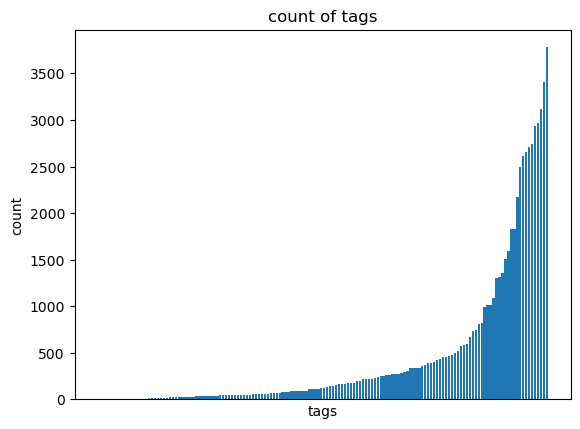

In [111]:
plt.bar(grouped_counts['tags'], grouped_counts['count'])
plt.xlabel("tags")
plt.xticks([])
plt.ylabel("count")
plt.title("count of tags")
plt.xticks(rotation = 45)
plt.show()

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [32]:
# OHE categorical variables/ tags here
# tags will have to be done manually

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [33]:
# perform train test split here
# do something with state and city

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [34]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [35]:
# perform EDA here

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized